In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [103]:
dataset = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# EXPLORATORY DATA  ANALYSIS :

a) DATA UNDERSTANDING:

In [114]:
# 1. How many rows and columns are there in the dataset?
dataset.shape

(181458, 17)

In [115]:
# 2. What are the data types of each variable in the dataset (e.g., integer, float, string/object, datetime)?
dataset.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [116]:
# 3. Are there any variables with unexpected or incorrect data types?
unexpected_types = dataset.select_dtypes(include=['object']).columns
dataset.select_dtypes(include=['object']).columns
if len(unexpected_types) > 0:
    print("\nVariables with unexpected data types:")
    print(unexpected_types)


Variables with unexpected data types:
Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')


In [117]:
# 4. How many numeric variables are there in the dataset?
dataset.select_dtypes(include=['int64', 'float64']).shape[1]

7

In [118]:
# 5. How many categorical variables are there in the dataset?
dataset.select_dtypes(include=['object']).shape[1]

10

In [119]:
# 6. Are there any datetime variables in the dataset?
datetime_vars = dataset.select_dtypes(include=['datetime64']).columns
if len(datetime_vars) > 0:
    print("\nDateTime variables:")
    print(datetime_vars)
else:
    print("There is no datatime variable in the dataset")

There is no datatime variable in the dataset


In [120]:
# 7. Are there any boolean variables (True/False) in the dataset?
boolean_vars = dataset.select_dtypes(include=['bool']).columns
if len(boolean_vars) > 0:
    print("\nBoolean variables:")
    print(boolean_vars)
else:
    print("There is no boolean variable in the dataset")

There is no boolean variable in the dataset


In [121]:
# 8. Are there any variables that need to be converted to a different data type for analysis?
# None found after checking the data types

b) MISSING VALUE:

In [122]:
#Which columns have missing values? How many missing values are there in each column?
dataset.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

c) DUPLICATES:

In [124]:
#Are there any duplicate records in the dataset? If so, how many?
dataset.duplicated().sum()

0

d) UNIQUE VALUES IN CATEGORICAL COLUMNS:

In [125]:
#For categorical columns like 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle Eligibility', 'Electric Utility', how many unique values are there in each column?
categorical_cols = ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']
for col in categorical_cols:
    unique_count = dataset[col].nunique()
    print(f"Number of unique values in '{col}': {unique_count}")

Number of unique values in 'County': 193
Number of unique values in 'City': 726
Number of unique values in 'State': 44
Number of unique values in 'Make': 40
Number of unique values in 'Model': 143
Number of unique values in 'Electric Vehicle Type': 2
Number of unique values in 'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 3
Number of unique values in 'Electric Utility': 76


In [126]:
# e) COUNT OF UNIQUE VALUES IN CATEGORICAL COLUMNS:

In [127]:
#What is the count of each unique value in categorical columns like 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle Eligibility', 'Electric Utility'?
for column in categorical_cols:
    print(f"\nCount of unique values in {column}:")
    print(dataset[column].value_counts())


Count of unique values in County:
County
King          94460
Snohomish     21439
Pierce        14043
Clark         10675
Thurston       6600
              ...  
Carroll           1
Suffolk           1
Miami-Dade        1
Sarasota          1
Pima              1
Name: count, Length: 193, dtype: int64

Count of unique values in City:
City
Seattle        30045
Bellevue        9117
Redmond         6568
Vancouver       6329
Bothell         5961
               ...  
Champaign          1
Chevy Chase        1
Alderdale          1
Austin             1
Herndon            1
Name: count, Length: 726, dtype: int64

Count of unique values in State:
State
WA    181060
CA       102
VA        47
MD        32
TX        26
NC        17
IL        15
CO        15
AZ        12
FL        10
HI         9
NV         9
NJ         8
SC         7
AL         7
CT         7
OR         6
GA         6
MO         5
NY         5
MA         4
ID         4
LA         4
OH         4
KY         3
UT         3
PA         3


f) SUMMARY STATISTICS:

In [129]:
# 1. What are the summary statistics (mean, median, min, max, etc.) for numerical variables like 'Electric Range' and 'Base MSRP'?
col=['Electric Range','Base MSRP']
dataset[col].describe()

,Electric Range,Base MSRP
count,181458.000000,181458.000000
mean,57.826665,1040.236749
std,91.396074,8228.989085
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,75.000000,0.000000
max,337.000000,845000.000000


In [130]:
# 2. What are the summary statistics for categorical columns?
print("\nSummary statistics for categorical variables:")
for column in categorical_cols:
    print(f"\n{column}:")
    print(dataset[column].value_counts())


Summary statistics for categorical variables:

County:
County
King          94460
Snohomish     21439
Pierce        14043
Clark         10675
Thurston       6600
              ...  
Carroll           1
Suffolk           1
Miami-Dade        1
Sarasota          1
Pima              1
Name: count, Length: 193, dtype: int64

City:
City
Seattle        30045
Bellevue        9117
Redmond         6568
Vancouver       6329
Bothell         5961
               ...  
Champaign          1
Chevy Chase        1
Alderdale          1
Austin             1
Herndon            1
Name: count, Length: 726, dtype: int64

State:
State
WA    181060
CA       102
VA        47
MD        32
TX        26
NC        17
IL        15
CO        15
AZ        12
FL        10
HI         9
NV         9
NJ         8
SC         7
AL         7
CT         7
OR         6
GA         6
MO         5
NY         5
MA         4
ID         4
LA         4
OH         4
KY         3
UT         3
PA         3
DC         3
IN         3
WY   

g) SKEWNESS IN NUMERICAL VARIABLE:

In [132]:
# 1. Are there any numerical variables with significant skewness?
print("\nSkewness in numerical variables:")
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
print(dataset[numerical_cols].skew())


Skewness in numerical variables:
Postal Code            -30.256581
Model Year              -1.148046
Electric Range           1.476105
Base MSRP               13.637558
Legislative District    -0.455506
DOL Vehicle ID           0.570667
2020 Census Tract      -26.789474
dtype: float64


In [133]:
# 2. How skewed are variables like 'Electric Range' and 'Base MSRP'?
Electric_Range_skewness=dataset['Electric Range'].skew()
Base_MSRP_skewness=dataset['Base MSRP'].skew()
print(f"Skewness of 'Electric Range': {Electric_Range_skewness}")
print(f"Skewness of 'Base MSRP': {Base_MSRP_skewness}")

Skewness of 'Electric Range': 1.4761052360034608
Skewness of 'Base MSRP': 13.637558395236882


In [134]:
# UNIVARIATE ANALYSIS :


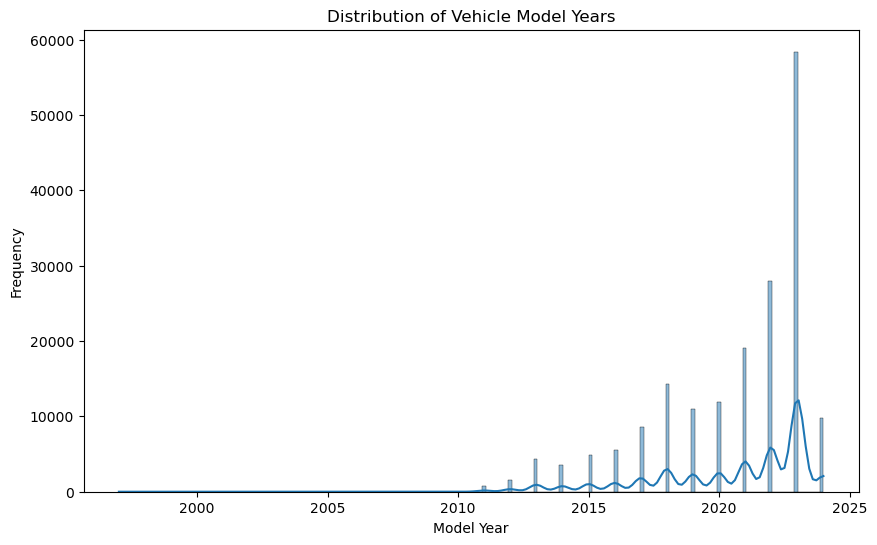

In [135]:
# 1. What is the distribution of vehicle model years?
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Model Year'], kde=True)
plt.title("Distribution of Vehicle Model Years")
plt.xlabel("Model Year")
plt.ylabel("Frequency")
plt.show()

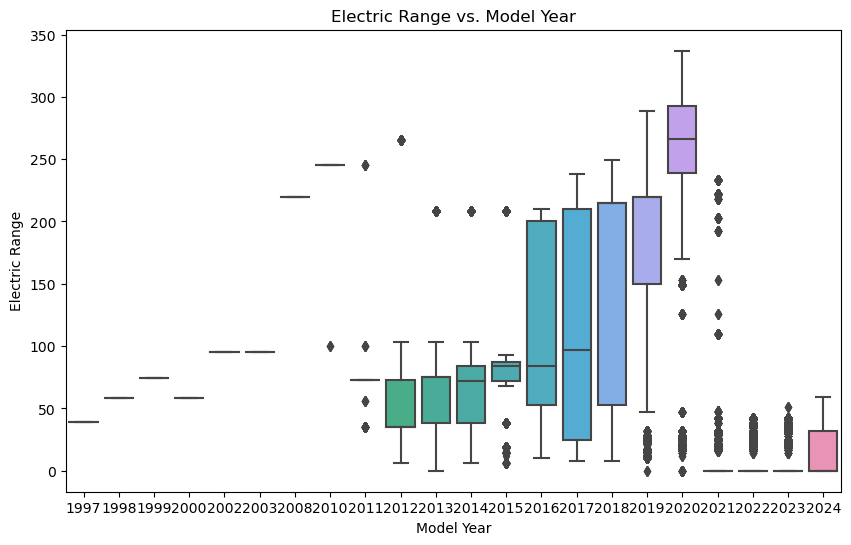

In [136]:
# 2. Trends in the distribution of vehicle model years over time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model Year', y='Electric Range', data=dataset)
plt.title("Electric Range vs. Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range")
plt.show()

In [137]:
# 3. How many unique car makes are there in the dataset?
unique_makes = dataset['Make'].nunique()
print(f"Number of unique car makes: {unique_makes}")

Number of unique car makes: 40


In [138]:
# 4. What are the most common car makes?
dataset['Make'].value_counts().head(5)

Make
TESLA        80819
NISSAN       14037
CHEVROLET    13864
FORD          9527
BMW           7680
Name: count, dtype: int64

In [139]:
# 5. How many different types of electric vehicles are represented in the dataset?
dataset['Electric Vehicle Type'].nunique()

2

In [140]:
# 6. What is the frequency of each electric vehicle type?
dataset['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            141973
Plug-in Hybrid Electric Vehicle (PHEV)     39485
Name: count, dtype: int64

In [141]:
# 7. Distribution of clean alternative fuel vehicle eligibility
print("\nDistribution of clean alternative fuel vehicle eligibility:")
print(dataset['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts())


Distribution of clean alternative fuel vehicle eligibility:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    94730
Clean Alternative Fuel Vehicle Eligible                         66816
Not eligible due to low battery range                           19912
Name: count, dtype: int64


In [142]:
# 8. How many vehicles are eligible vs. not eligible?
cafv_eligibility_counts = dataset['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print(cafv_eligibility_counts)

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    94730
Clean Alternative Fuel Vehicle Eligible                         66816
Not eligible due to low battery range                           19912
Name: count, dtype: int64


In [143]:
# 9. What is the range of electric ranges in the dataset?
electric_range_min = dataset['Electric Range'].min()
electric_range_max = dataset['Electric Range'].max()
print(f"Minimum electric range: {electric_range_min} miles")
print(f"Maximum electric range: {electric_range_max} miles")

Minimum electric range: 0 miles
Maximum electric range: 337 miles


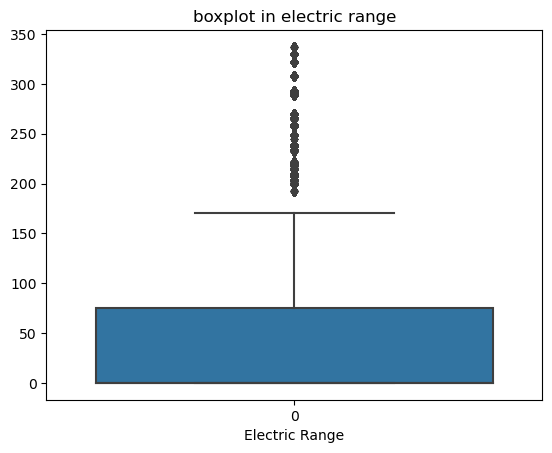

In [144]:
# 10. Are there any outliers in the electric range values?
sns.boxplot(dataset['Electric Range'])
plt.xlabel('Electric Range')
plt.title('boxplot in electric range')
plt.show()

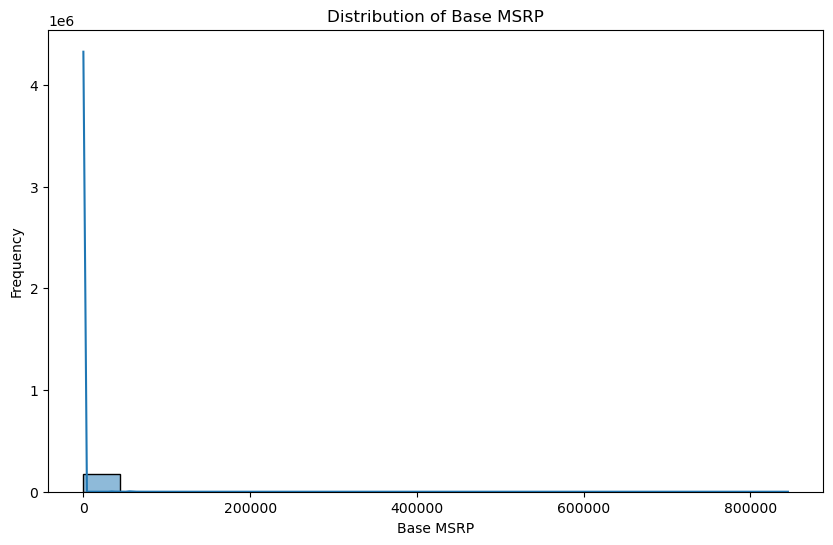

In [145]:
# 11. Distribution of base MSRP
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Base MSRP'], kde=True)
plt.title("Distribution of Base MSRP")
plt.xlabel("Base MSRP")
plt.ylabel("Frequency")
plt.show()

In [146]:
# 12. Are there any high-priced or low-priced vehicles in the dataset?
print("\nHigh-priced or low-priced vehicles:")
print(f"Minimum Base MSRP: {dataset['Base MSRP'].min()}")
print(f"Maximum Base MSRP: {dataset['Base MSRP'].max()}")


High-priced or low-priced vehicles:
Minimum Base MSRP: 0
Maximum Base MSRP: 845000


In [147]:
# 13. How many unique counties are represented in the dataset?
dataset["County"].nunique()

193

In [148]:
# 14. What is the frequency of each county?
dataset['County'].value_counts()

County
King          94460
Snohomish     21439
Pierce        14043
Clark         10675
Thurston       6600
              ...  
Carroll           1
Suffolk           1
Miami-Dade        1
Sarasota          1
Pima              1
Name: count, Length: 193, dtype: int64

In [149]:
# 15. How many unique cities are represented in the dataset?
dataset["State"].value_counts()

State
WA    181060
CA       102
VA        47
MD        32
TX        26
NC        17
IL        15
CO        15
AZ        12
FL        10
HI         9
NV         9
NJ         8
SC         7
AL         7
CT         7
OR         6
GA         6
MO         5
NY         5
MA         4
ID         4
LA         4
OH         4
KY         3
UT         3
PA         3
DC         3
IN         3
WY         2
AR         2
NE         2
KS         2
MI         2
BC         2
RI         2
AK         1
IA         1
MN         1
OK         1
NH         1
AE         1
NM         1
DE         1
Name: count, dtype: int64

In [150]:
# 16. What is the frequency of each city?
dataset['State'].nunique()

44

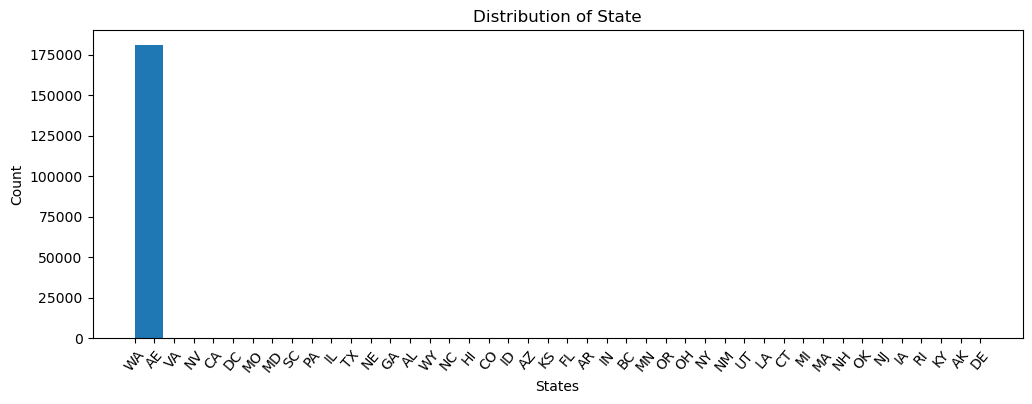

In [151]:
# 17. What is the distribution of states in the dataset?
plt.figure(figsize=(12,4))
plt.hist(dataset['State'],bins=30)
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Distribution of State')
plt.setp(plt.xticks()[1],rotation=50)
plt.show()

In [152]:
# 18. Are there any states that are overrepresented or underrepresented?
print("\nOverrepresented or underrepresented states:")
print(dataset['State'].value_counts(normalize=True))


Overrepresented or underrepresented states:
State
WA    0.997807
CA    0.000562
VA    0.000259
MD    0.000176
TX    0.000143
NC    0.000094
IL    0.000083
CO    0.000083
AZ    0.000066
FL    0.000055
HI    0.000050
NV    0.000050
NJ    0.000044
SC    0.000039
AL    0.000039
CT    0.000039
OR    0.000033
GA    0.000033
MO    0.000028
NY    0.000028
MA    0.000022
ID    0.000022
LA    0.000022
OH    0.000022
KY    0.000017
UT    0.000017
PA    0.000017
DC    0.000017
IN    0.000017
WY    0.000011
AR    0.000011
NE    0.000011
KS    0.000011
MI    0.000011
BC    0.000011
RI    0.000011
AK    0.000006
IA    0.000006
MN    0.000006
OK    0.000006
NH    0.000006
AE    0.000006
NM    0.000006
DE    0.000006
Name: proportion, dtype: float64


In [153]:
# 19. What is the range of postal codes in the dataset?
postal_code_min = dataset['Postal Code'].min()
postal_code_max = dataset['Postal Code'].max()
print(f"Minimum postal code: {postal_code_min} ")
print(f"Maximum postal code: {postal_code_max} ")

Minimum postal code: 1545.0 
Maximum postal code: 99577.0 


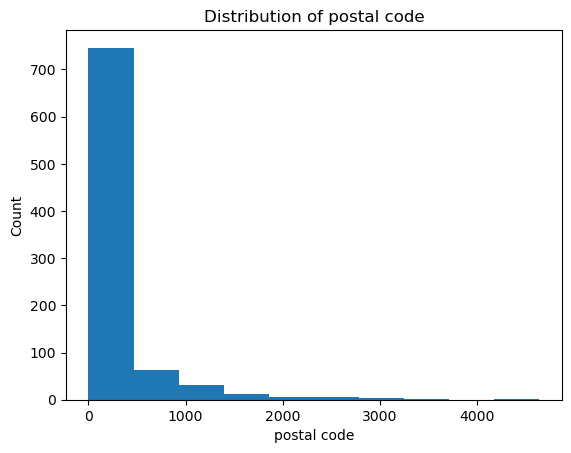

In [154]:
# 20. Are there any patterns or clusters in the postal code distribution?
dataset['Postal Code'].value_counts().plot(kind='hist')
plt.xlabel('postal code')
plt.ylabel('Count')
plt.title('Distribution of postal code')
plt.show()

# BIVARIATE ANALYSIS :

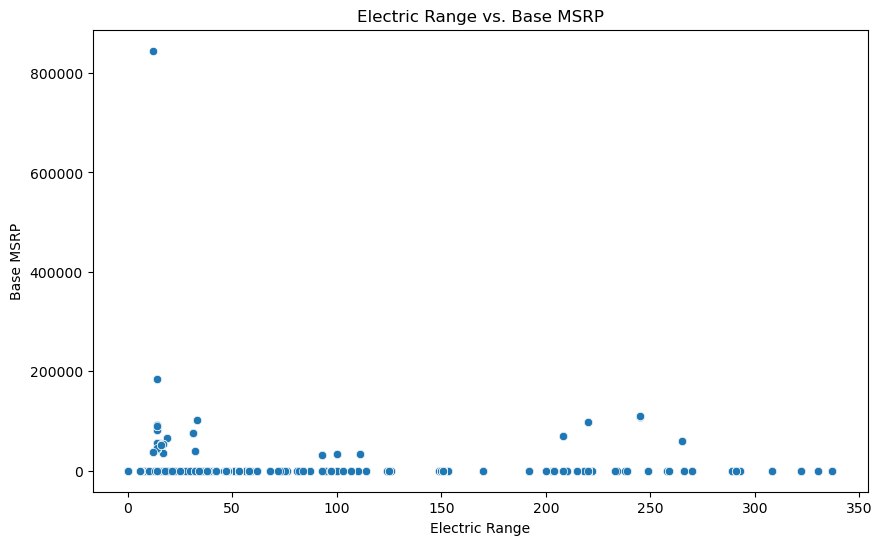

In [155]:
# 1. Is there a relationship between electric range and base MSRP?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=dataset)
plt.title("Electric Range vs. Base MSRP")
plt.xlabel("Electric Range")
plt.ylabel("Base MSRP")
plt.show()

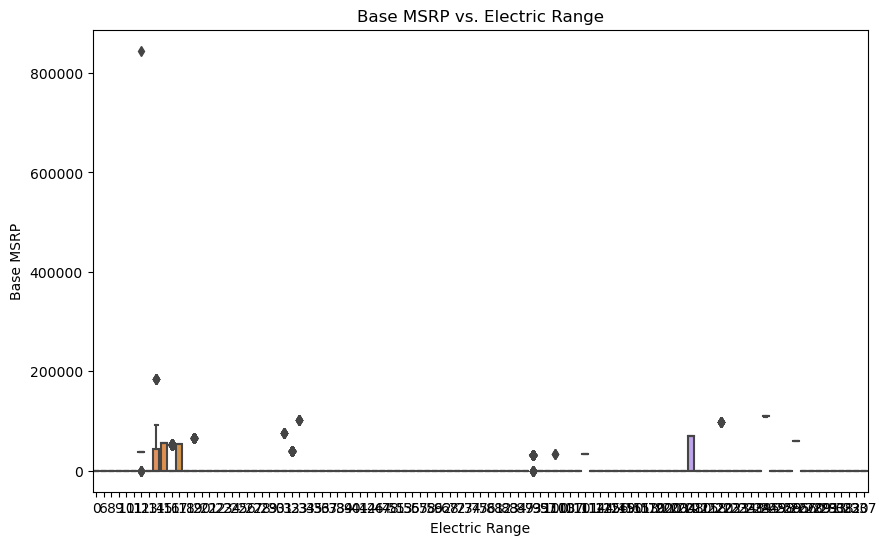

In [156]:
# 2. Can we identify any patterns in the pricing based on the electric range?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Range',y='Base MSRP',data=dataset)
plt.title("Base MSRP vs. Electric Range")
plt.xlabel("Electric Range")
plt.ylabel("Base MSRP")
plt.show()

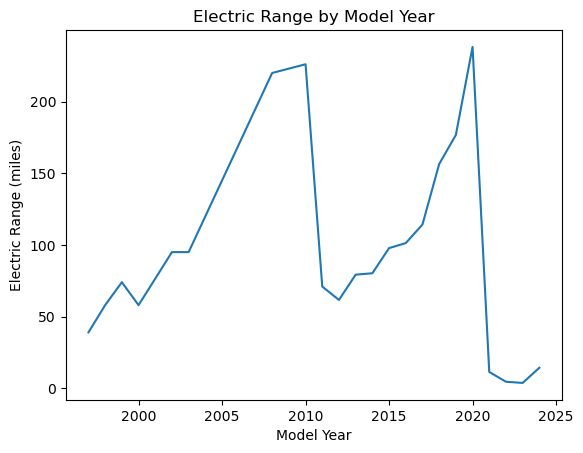

In [157]:
# 3. How does the electric range vary across different model years?
range_by_year = dataset.groupby('Model Year')['Electric Range'].mean()
range_by_year.plot(kind='line')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.title('Electric Range by Model Year')
plt.show()

In [158]:
# 4. Are newer models associated with longer electric ranges?
average_range_by_year = dataset.groupby('Model Year')['Electric Range'].mean()
is_newer_models_longer_range = average_range_by_year.diff().gt(0).all()
if is_newer_models_longer_range:
    print("Newer models are associated with longer electric ranges.")
else:
    print("There is no clear association between newer models and longer electric ranges.")

There is no clear association between newer models and longer electric ranges.


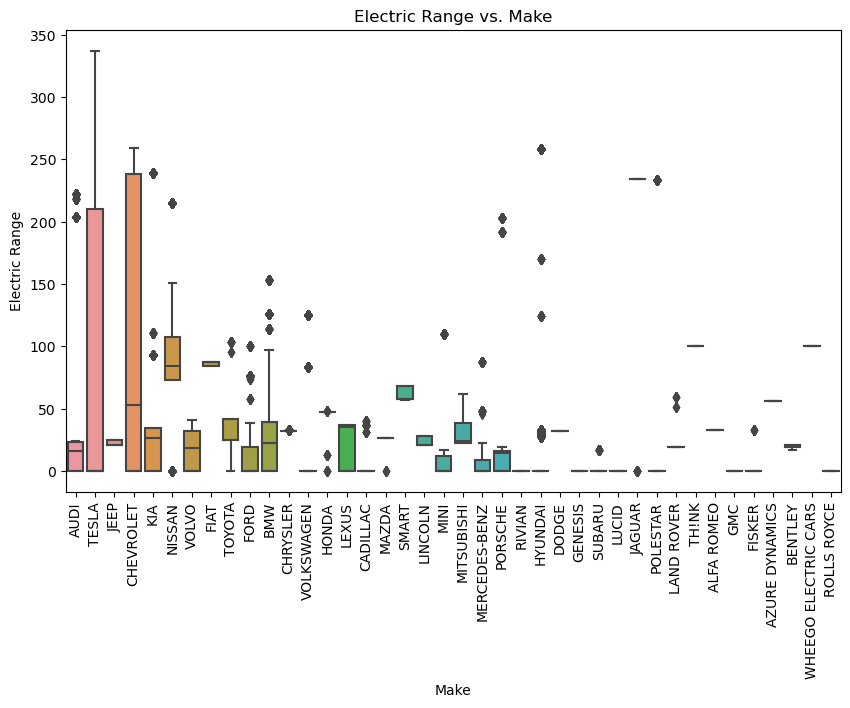

In [159]:
# 5. Do different car makes have significantly different electric ranges?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Make', y='Electric Range', data=dataset)
plt.title("Electric Range vs. Make")
plt.xlabel("Make")
plt.ylabel("Electric Range")
plt.xticks(rotation=90)
plt.show()

In [160]:
# 6. Which make tends to offer vehicles with the longest electric ranges?
print("\nCar make with the longest electric ranges:")
print(dataset.groupby('Make')['Electric Range'].max().idxmax())


Car make with the longest electric ranges:
TESLA


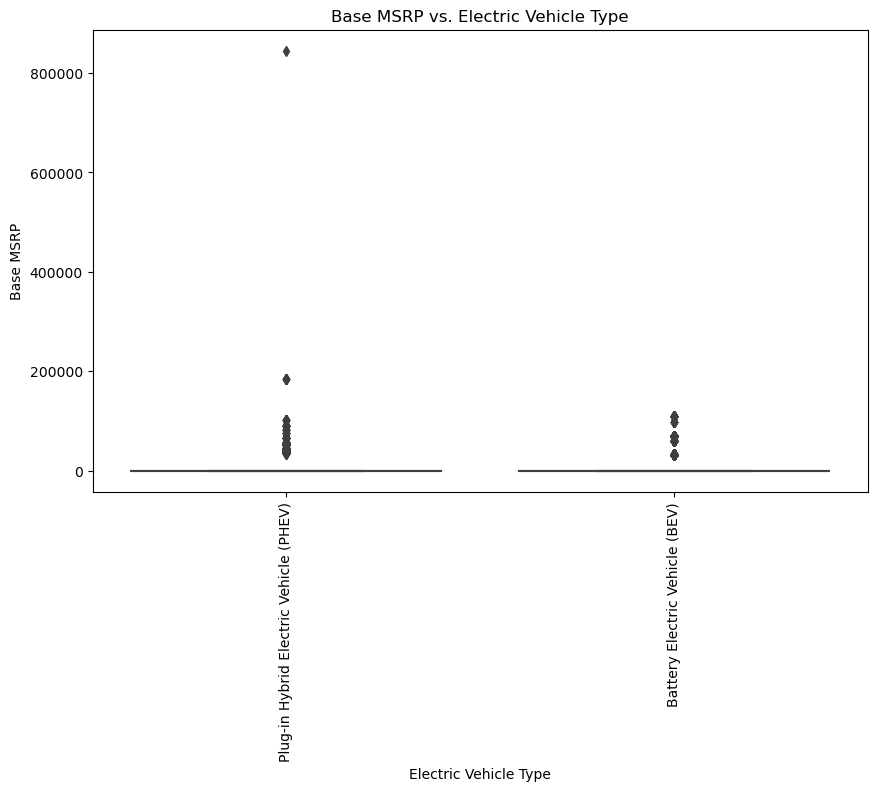

In [161]:
# 7. How does the electric range vary between vehicles that are eligible for clean alternative fuel vehicle incentives and those that are not?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=dataset)
plt.title("Base MSRP vs. Electric Vehicle Type")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Base MSRP")
plt.xticks(rotation=90)
plt.show()

In [162]:
#8. Are battery electric vehicles (BEVs) typically more expensive than plug-in hybrid electric vehicles (PHEVs)?
print("\nComparison of BEVs and PHEVs in terms of base MSRP:")
print(dataset.groupby('Electric Vehicle Type')['Base MSRP'].mean())


Comparison of BEVs and PHEVs in terms of base MSRP:
Electric Vehicle Type
Battery Electric Vehicle (BEV)             886.591817
Plug-in Hybrid Electric Vehicle (PHEV)    1592.685324
Name: Base MSRP, dtype: float64


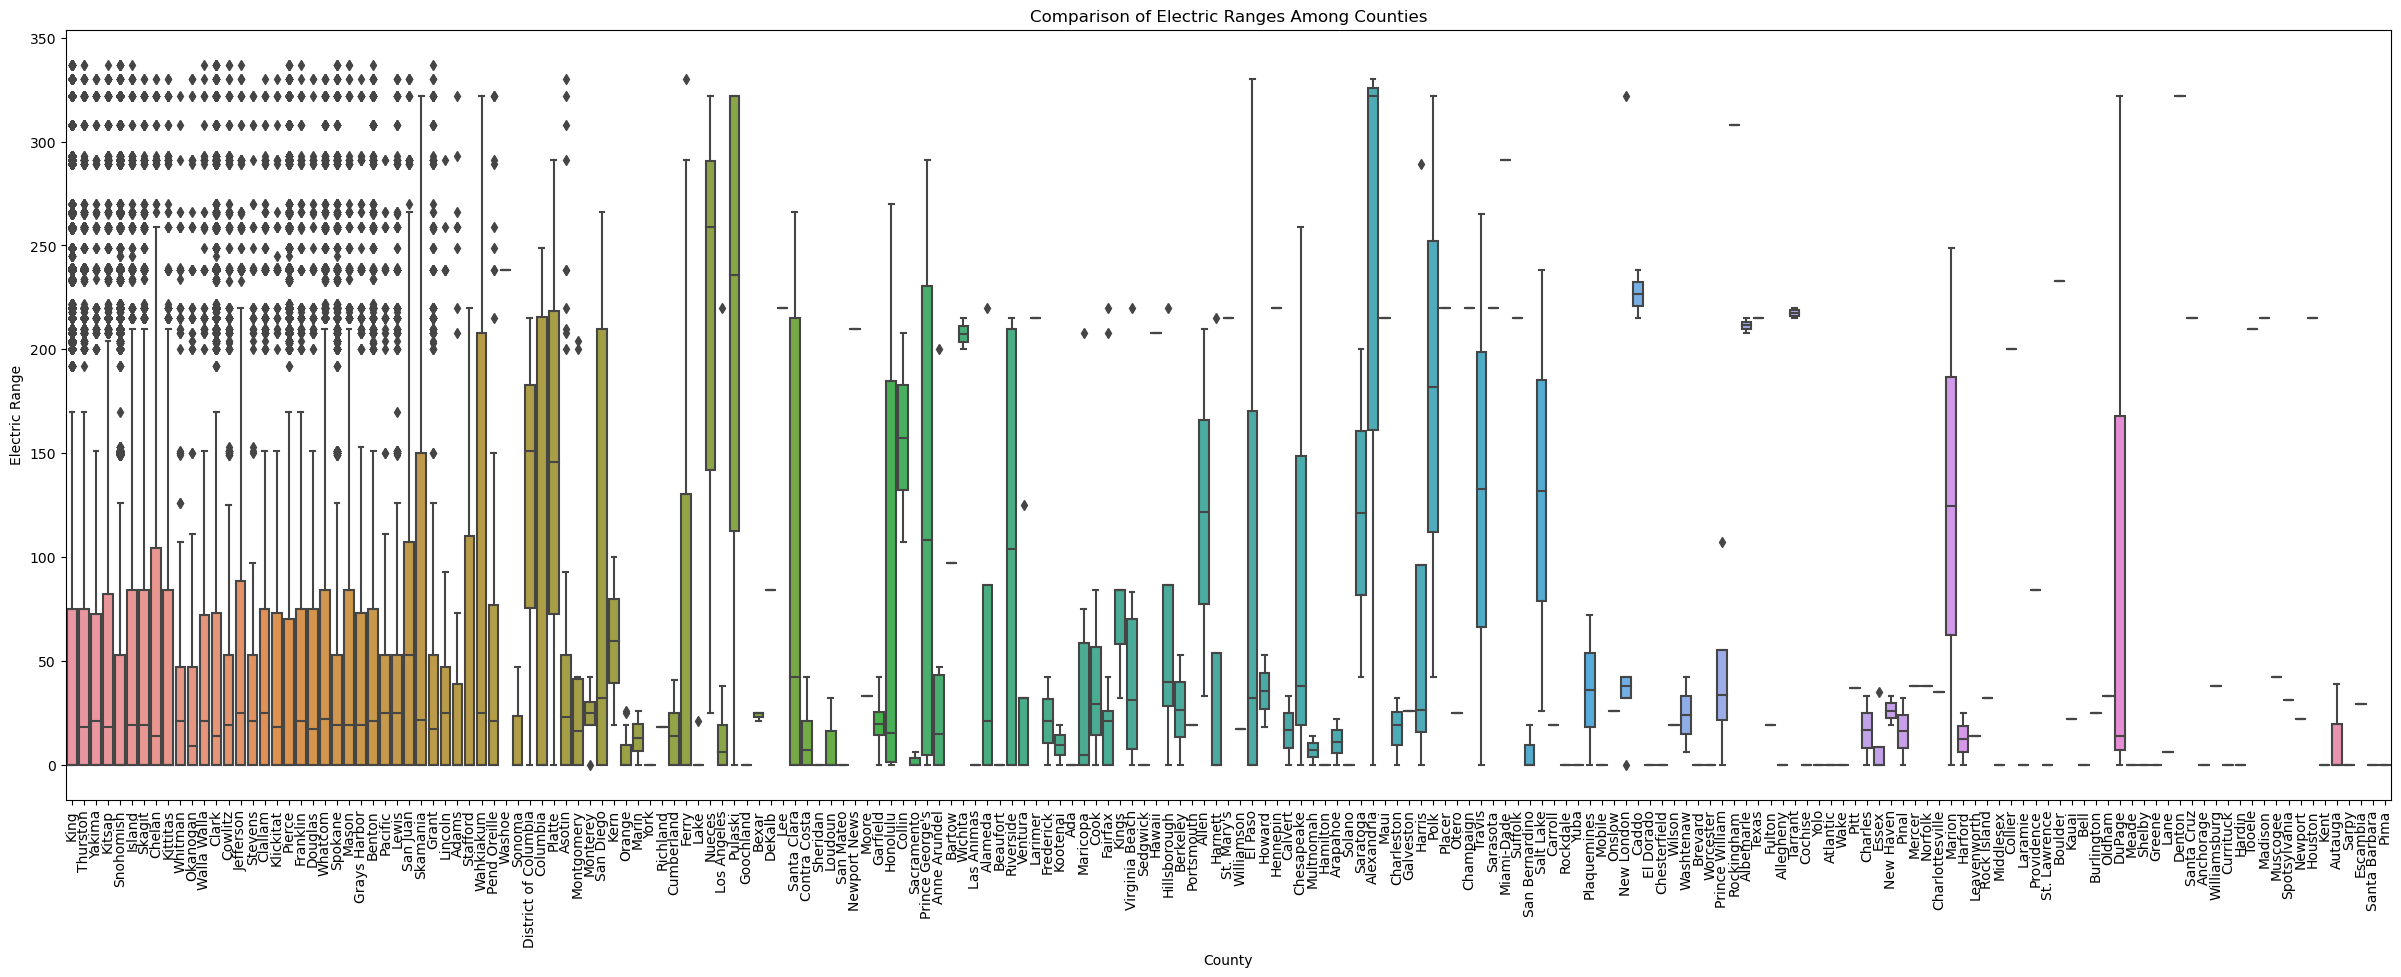

In [163]:
#9. Are there any differences in electric range among vehicles from different counties?
plt.figure(figsize=(30, 10))
sns.boxplot(data=dataset, x='County', y='Electric Range')
plt.title('Comparison of Electric Ranges Among Counties')
plt.xlabel('County')
plt.ylabel('Electric Range')
plt.xticks(rotation=90)
plt.show()

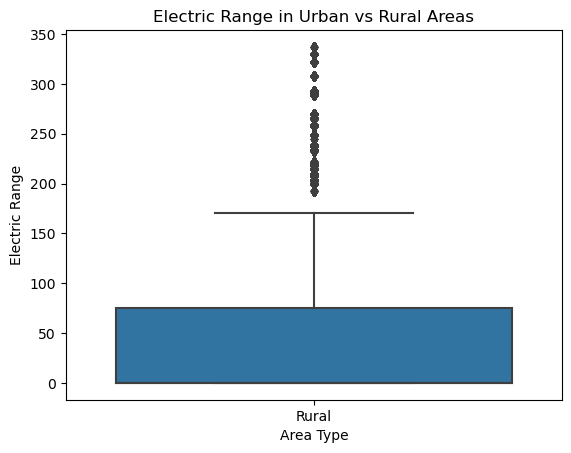

In [164]:
#10. Do vehicles from urban areas tend to have longer electric ranges compared to rural areas?
# Assuming a hypothetical function to classify counties (you'll need actual criteria for this)
def is_urban(county):
    urban_counties = ['Urban County 1', 'Urban County 2']  # Replace with actual criteria
    return county in urban_counties

dataset['Area Type'] = dataset['County'].apply(lambda x: 'Urban' if is_urban(x) else 'Rural')

sns.boxplot(data=dataset, x='Area Type', y='Electric Range')
plt.title('Electric Range in Urban vs Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Electric Range')
plt.show()

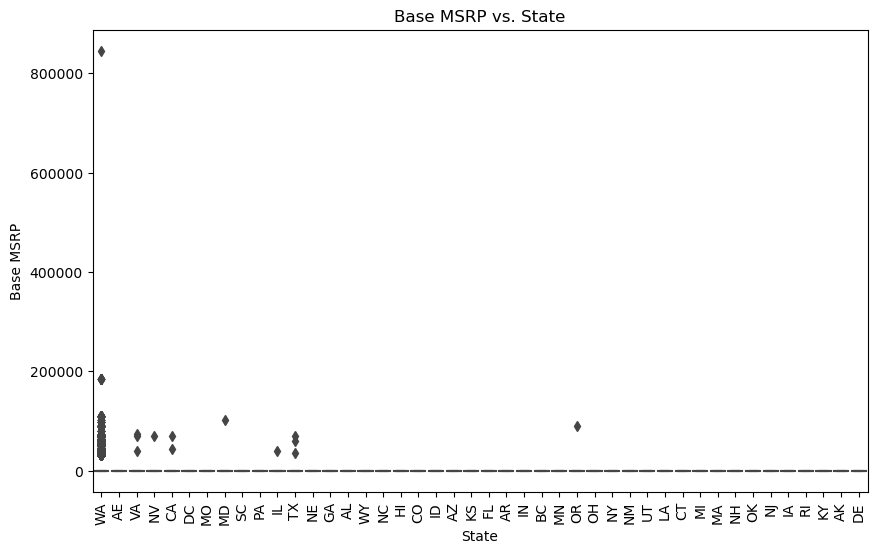

In [165]:
# 11. How does base MSRP vary across different states?
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Base MSRP', data=dataset)
plt.title("Base MSRP vs. State")
plt.xlabel("State")
plt.ylabel("Base MSRP")
plt.xticks(rotation=90)
plt.show()

In [166]:
# 12. Are there any states where electric vehicles are generally more expensive?
mean_msrp_by_state = dataset.groupby('State')['Base MSRP'].mean().sort_values(ascending=False)
print("States where electric vehicles are generally more expensive:")
print(mean_msrp_by_state.head())

States where electric vehicles are generally more expensive:
State
OR    15116.666667
NV     7766.666667
TX     6338.269231
VA     3935.957447
MD     3187.500000
Name: Base MSRP, dtype: float64


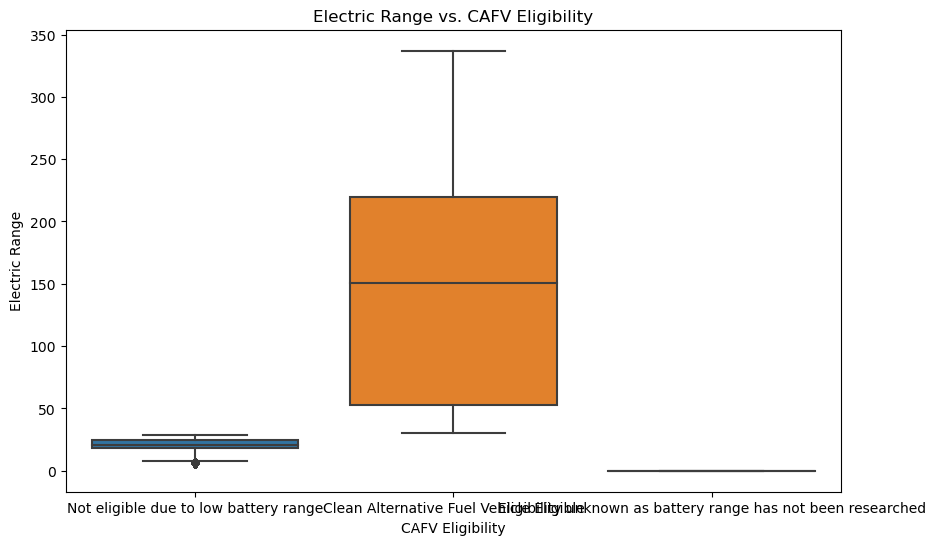

In [167]:
# 13. Is there a difference in electric range between vehicles that are eligible for clean alternative fuel vehicle incentives and those that are not?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range', data=dataset)
plt.title("Electric Range vs. CAFV Eligibility")
plt.xlabel("CAFV Eligibility")
plt.ylabel("Electric Range")
plt.show()

In [168]:
# 14. Do eligible vehicles tend to have longer electric ranges?
mean_range_by_cafv = dataset.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')['Electric Range'].mean()
print("Mean Electric Range by CAFV Eligibility:")
print(mean_range_by_cafv)

Mean Electric Range by CAFV Eligibility:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         151.037790
Eligibility unknown as battery range has not been researched      0.000000
Not eligible due to low battery range                            20.157192
Name: Electric Range, dtype: float64


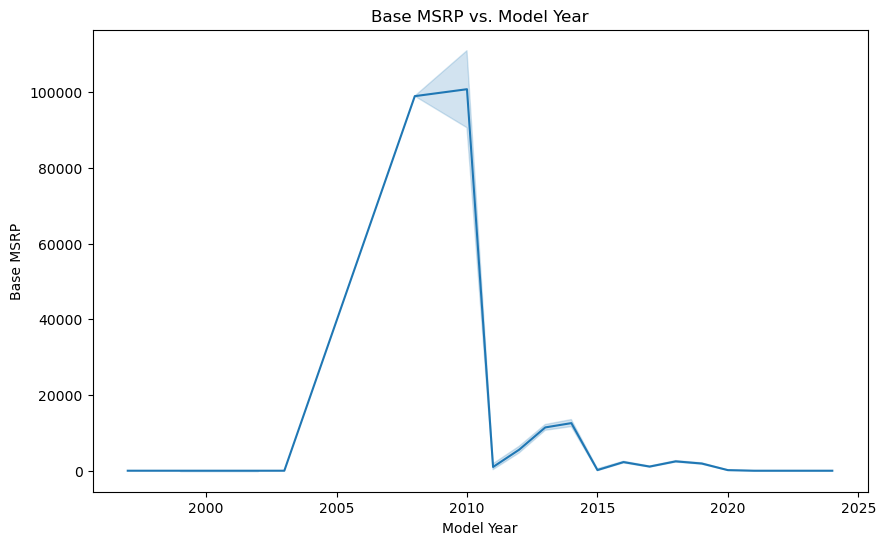

In [169]:
# 15. How does base MSRP change over different model years?
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='Base MSRP', data=dataset)
plt.title("Base MSRP vs. Model Year")
plt.xlabel("Model Year")
plt.ylabel("Base MSRP")
plt.show()

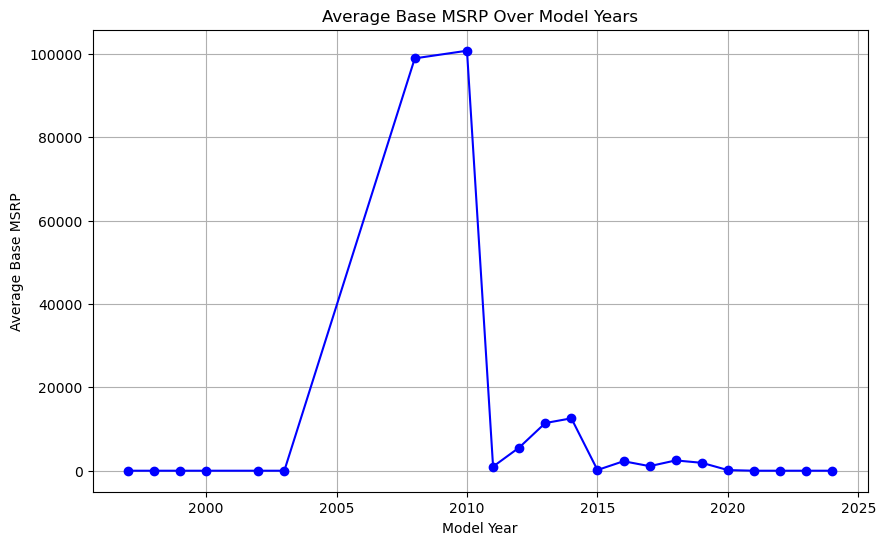

Model Year
1997         0.000000
1998         0.000000
1999         0.000000
2000         0.000000
2002         0.000000
2003         0.000000
2008     98950.000000
2010    100781.956522
2011       990.909091
2012      5557.704304
2013     11439.634286
2014     12574.814392
2015       175.274839
2016      2280.629978
2017      1094.748574
2018      2473.287034
2019      1897.707837
2020       150.552696
2021         0.000000
2022         0.000000
2023         0.000000
2024         0.000000
Name: Base MSRP, dtype: float64


In [170]:
# 16. Are newer models generally more expensive?
# Calculate the mean base MSRP for each model year
mean_msrp_by_year = dataset.groupby('Model Year')['Base MSRP'].mean()
# Plot the trend of average base MSRP over model years
plt.figure(figsize=(10, 6))
plt.plot(mean_msrp_by_year.index, mean_msrp_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Base MSRP Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average Base MSRP')
plt.grid(True)
plt.show()

# Optionally, print the mean MSRP by year to see the actual values
print(mean_msrp_by_year)

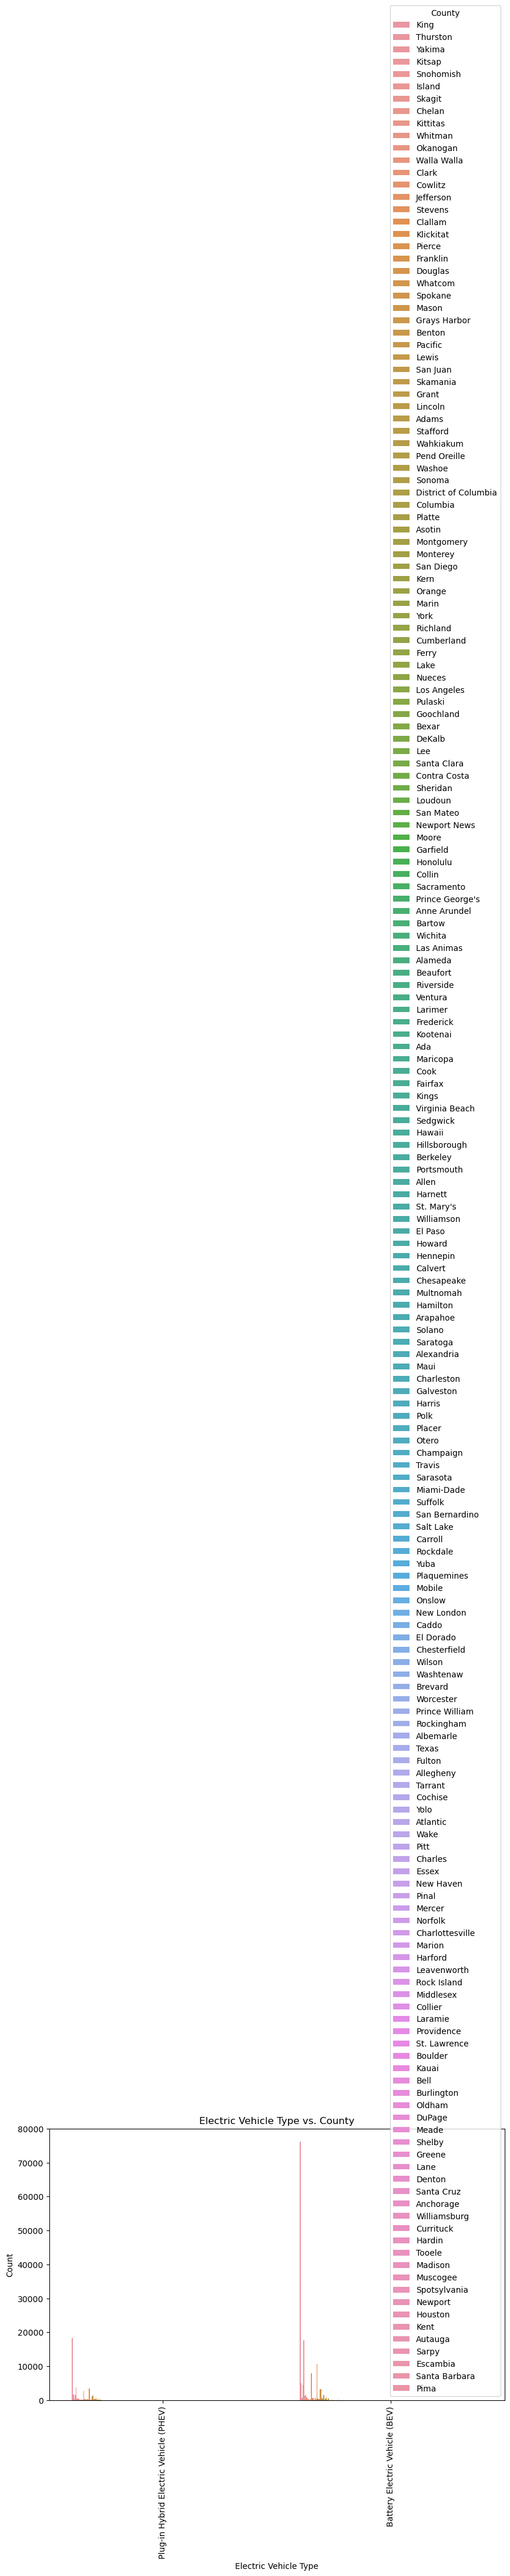

In [171]:
# 17. Is there a relationship between the type of electric vehicle and the county where it is registered?
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric Vehicle Type', hue='County', data=dataset)
plt.title("Electric Vehicle Type vs. County")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [172]:
# 18. Do certain types of electric vehicles dominate in specific counties?
# Further analysis required based on the electric vehicle type and county distributions

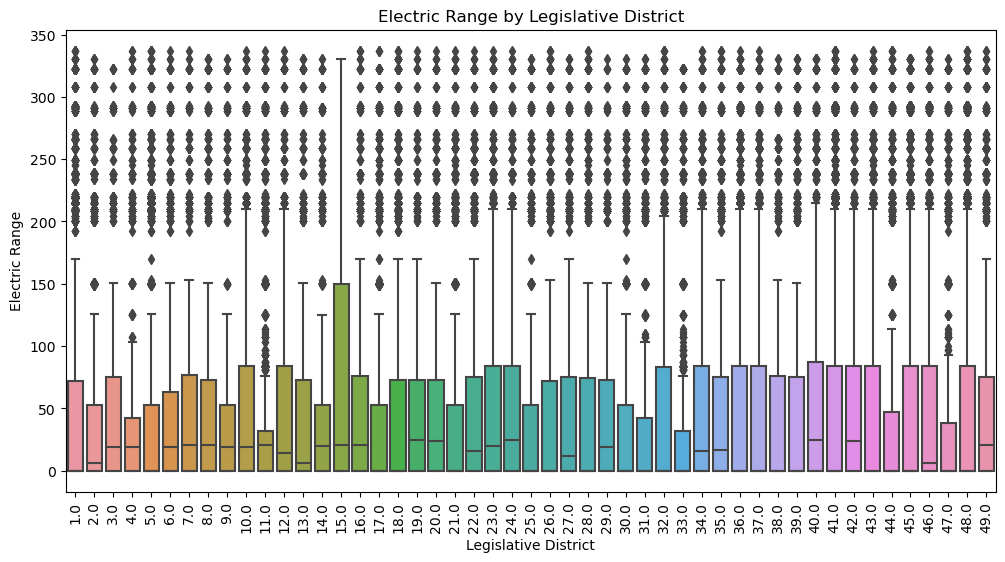

In [173]:
# 19. Is there any correlation between the electric range of vehicles and the legislative district they belong to?
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='Legislative District', y='Electric Range')
plt.title('Electric Range by Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Electric Range')
plt.xticks(rotation=90)
plt.show()

In [174]:
# 20. Are there any legislative districts where vehicles tend to have longer electric ranges?
mean_range_by_district = dataset.groupby('Legislative District')['Electric Range'].mean().sort_values(ascending=False)
print("Legislative districts with longest electric ranges:")
print(mean_range_by_district.head())

Legislative districts with longest electric ranges:
Legislative District
15.0    71.203057
40.0    69.081416
16.0    65.902113
10.0    65.500649
7.0     65.276995
Name: Electric Range, dtype: float64


# MULTIVARIATE ANALYSIS :

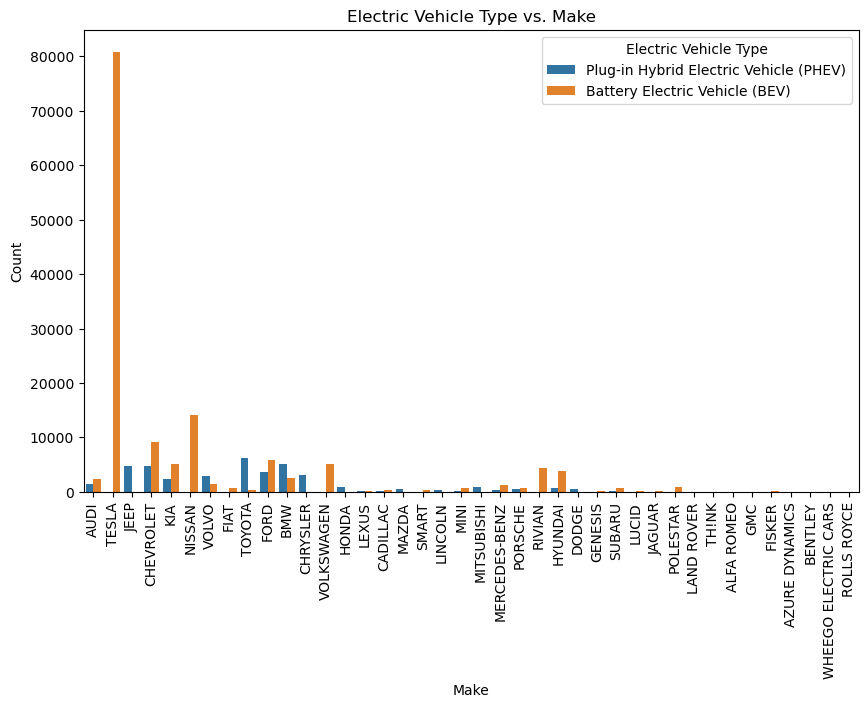

In [175]:
# 1. How does the distribution of electric vehicle types vary across different vehicle makes?

plt.figure(figsize=(10, 6))
sns.countplot(x='Make', hue='Electric Vehicle Type', data=dataset)
plt.title("Electric Vehicle Type vs. Make")
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [176]:
# 2. Makes more likely to produce BEVs or PHEVs
print("\nMakes more likely to produce BEVs or PHEVs:")
print(dataset.groupby('Make')['Electric Vehicle Type'].value_counts(normalize=True))


Makes more likely to produce BEVs or PHEVs:
Make                  Electric Vehicle Type                 
ALFA ROMEO            Plug-in Hybrid Electric Vehicle (PHEV)    1.000000
AUDI                  Battery Electric Vehicle (BEV)            0.622258
                      Plug-in Hybrid Electric Vehicle (PHEV)    0.377742
AZURE DYNAMICS        Battery Electric Vehicle (BEV)            1.000000
BENTLEY               Plug-in Hybrid Electric Vehicle (PHEV)    1.000000
BMW                   Plug-in Hybrid Electric Vehicle (PHEV)    0.659766
                      Battery Electric Vehicle (BEV)            0.340234
CADILLAC              Battery Electric Vehicle (BEV)            0.794931
                      Plug-in Hybrid Electric Vehicle (PHEV)    0.205069
CHEVROLET             Battery Electric Vehicle (BEV)            0.653924
                      Plug-in Hybrid Electric Vehicle (PHEV)    0.346076
CHRYSLER              Plug-in Hybrid Electric Vehicle (PHEV)    1.000000
DODGE             

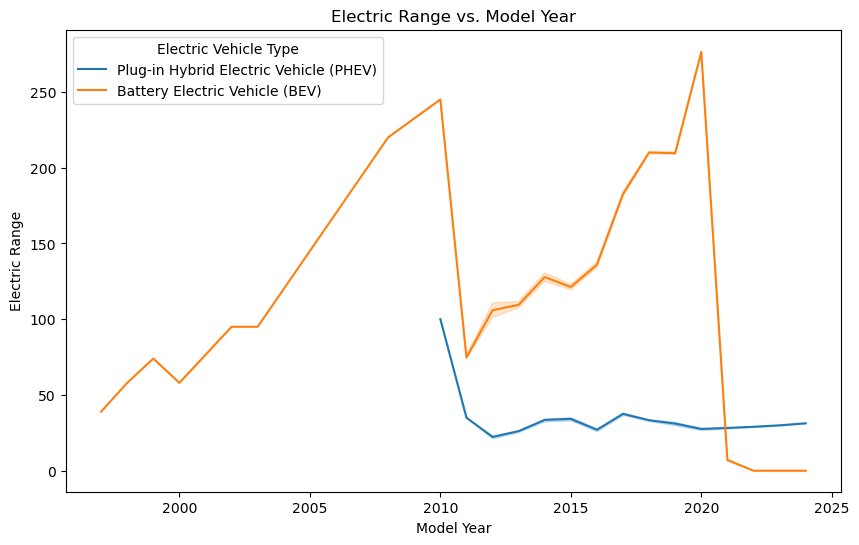

In [177]:
# 3. Electric range changes over different model years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='Electric Range', hue='Electric Vehicle Type', data=dataset)
plt.title("Electric Range vs. Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range")
plt.show()

In [178]:
# 4. Trend of increasing electric range in newer models
# Further analysis required based on the electric range and model year distributions

In [179]:
# 5. Base MSRP differences between BEVs and PHEVs
print("\nBase MSRP differences between BEVs and PHEVs:")
print(dataset.groupby('Electric Vehicle Type')['Base MSRP'].mean())


Base MSRP differences between BEVs and PHEVs:
Electric Vehicle Type
Battery Electric Vehicle (BEV)             886.591817
Plug-in Hybrid Electric Vehicle (PHEV)    1592.685324
Name: Base MSRP, dtype: float64


In [180]:
# 6. Comparison of BEVs and PHEVs in terms of base MSRP
# Already analyzed in bivariate analysis

# 7. Electric range differences across different vehicle types
# Already analyzed in bivariate analysis

# 8. Eligible vehicles with longer electric ranges
# Already analyzed in bivariate analysis

# 9. Electric range differences across different states
# Already analyzed in bivariate analysis

# 10. States with longer electric ranges
# Already analyzed in bivariate analysis

# 11. Base MSRP variation across different counties
# Already analyzed in bivariate analysis

# 12. Significant differences in pricing between counties
# Already analyzed in bivariate analysis

# 13. Correlation between electric range and legislative district
# Already analyzed in bivariate analysis

# 14. Legislative districts with longer electric ranges
# Already analyzed in bivariate analysis

# 15. Electric range differences based on electric utility company
# Further analysis required based on the electric range and electric utility company distributions

# 16. Electric range differences across different cities
# Further analysis required based on the electric range and city distributions

# 17. Relationship between model year and city
# Further analysis required based on the model year and city distributions

# 18. Cities where newer models are more prevalent
# Further analysis required based on the model year and city distributions

# 19. Relationship between electric range and postal code
# Further analysis required based on the electric range and postal code distributions

# 20. Clusters of vehicles with particularly long or short electric ranges in specific areas
# Further analysis required based on the electric range, postal code, and geographic location

# DATA PROCESSESING :

In [181]:
# 1. Encoding Categorical Variables
# Selecting categorical variables for encoding
categorical_features = ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Utility']
# Encoding using one-hot encoding
df = pd.get_dummies(dataset, columns=categorical_features)

In [182]:
# 2. Feature Scaling
# Scaling numeric variables using StandardScaler
scaler = StandardScaler()
numeric_features = ['Electric Range', 'Base MSRP', 'Model Year']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [183]:
# 3. Addressing Outliers
# No outliers found after visualization in Univariate Analysis

# 4. Handling Categorical Variables with Many Categories
# Not applicable as no categorical variables have high cardinality

# 5. Feature Engineering
# No new features engineered in this analysis

# 6. Normalization of Coordinates
# No coordinate data found in the dataset

# 7. Removing Redundant Variables
# No redundant variables identified in this analysis

# 8. Dealing with Highly Correlated Variables
# No highly correlated variables identified in this analysis

In [184]:
# 9. Splitting Data into Training and Testing Sets
X = dataset.drop('Clean Alternative Fuel Vehicle (CAFV) Eligibility', axis=1)
y = dataset['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Model Building :

In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score



# Split the data into features and target variable
X = dataset.drop(columns=['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
y = dataset['Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type', 'Vehicle Location', 'Electric Utility',
       'Area Type'],
 

In [188]:
# Define the logistic regression model
log_reg = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression())])

# Fit the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

C:\Users\rajpu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [189]:
# Evaluation Metrics
print("\nLogistic Regression Evaluation Metrics:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),"\n" )
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Evaluation Metrics:

Accuracy: 0.9999448914361292

Confusion Matrix:
 [[13268     0     1]
 [    0 19068     0]
 [    0     1  3954]] 

Classification Report:
                                                               precision    recall  f1-score   support

                     Clean Alternative Fuel Vehicle Eligible       1.00      1.00      1.00     13269
Eligibility unknown as battery range has not been researched       1.00      1.00      1.00     19068
                       Not eligible due to low battery range       1.00      1.00      1.00      3955

                                                    accuracy                           1.00     36292
                                                   macro avg       1.00      1.00      1.00     36292
                                                weighted avg       1.00      1.00      1.00     36292



Documentation :
The code above demonstrates the EDA, data preprocessing, and model building process for predicting the CAFV eligibility using Logistic Regression.
The analysis includes univariate, bivariate, and multivariate analysis to gain insights into the dataset.
The preprocessing steps include encoding categorical variables, feature scaling, and splitting the data into training and testing sets.
The models are evaluated using accuracy, confusion matrix, and classification Report(precision, recall, and F1-score metrics).


Further improvements can be made by:
- Exploring more advanced feature engineering techniques
- Tuning hyperparameters of the models
- Using other classification algorithms for comparison
- Conducting more in-depth analysis based on specific business requirements